<a href="https://colab.research.google.com/github/as-bestinclass/anand4MahiGaming/blob/main/Scenario_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt

#Load Data

### Sales DataFrame

In [2]:
#this is the original data frame from the data provided
FEATUREPURCHASEMETRICS_DF = pd.read_csv('/content/Scenario I.csv')
FEATUREPURCHASEMETRICS_DF.head()

,timestamp,FeatureBuyChoice,Purchased Feature count
0,6/2/2022 0:00,purchase4,1118
1,6/2/2022 0:00,purchase5,304
2,6/2/2022 0:00,purchase6,244
3,6/3/2022 0:00,purchase4,4010
4,6/3/2022 0:00,purchase5,1032


###Cost DataFrame

In [3]:
# this is a python dict derived from the cost of each Bonus Buy product paired with the user cost to buy it in game's native currency
Cost_dict = {
    'FeatureBuyChoice': ['purchase4', 'purchase5', 'purchase6'],
    'Cost': [150, 240, 300]
}

Cost_DF = pd.DataFrame(Cost_dict)
Cost_DF.head()

,FeatureBuyChoice,Cost
0,purchase4,150
1,purchase5,240
2,purchase6,300


### Merged Dataframe

In [4]:
# Merged Dataframe from all the sourced data on 'FeatureBuyChoice' column
Complete_DF = pd.merge(FEATUREPURCHASEMETRICS_DF, Cost_DF, on='FeatureBuyChoice')
Complete_DF['Total Cost'] = Complete_DF['Cost'] * Complete_DF['Purchased Feature count']
#converting timestamp as actual timestamp for consitency
Complete_DF['timestamp'] = pd.to_datetime(Complete_DF['timestamp'])

Complete_DF.head()

,timestamp,FeatureBuyChoice,Purchased Feature count,Cost,Total Cost
0,2022-06-02,purchase4,1118,150,167700
1,2022-06-03,purchase4,4010,150,601500
2,2022-06-04,purchase4,3300,150,495000
3,2022-06-05,purchase4,3013,150,451950
4,2022-06-06,purchase4,3110,150,466500


# Analysis Thru Visualizations (Question 1 | Conclusions Included)

### 1. Trend Analysis
#### Conclusions:
1.   Bonuses sold peaked on June 3rd and June 8th compared to neighboring dates while it plateaued on between those dates with lowest on June 5th
2.   Datapoints on June 2nd appears to be partial data, since it is not consistent with rest of the data points



##### Exhibit A -- Line Chart

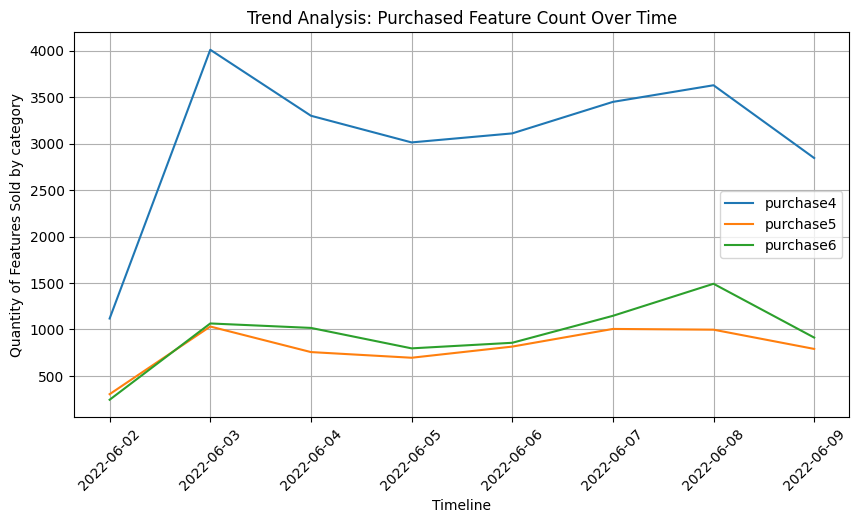

In [5]:
# Plotting a 10x5 chart
pyplt.figure(figsize=(10, 5))

#identifying features and unique features
features = Complete_DF['FeatureBuyChoice']
featureCategory = features.unique()

# Plotting 3 lines using for loop
for eachFtr in featureCategory:
    subset = Complete_DF[features == eachFtr]
    pyplt.plot(subset['timestamp'], subset['Purchased Feature count'], label=eachFtr)

#Displaying the chart
pyplt.title('Trend Analysis: Purchased Feature Count Over Time')
pyplt.xlabel('Timeline')
pyplt.ylabel('Quantity of Features Sold by category')
pyplt.legend()
pyplt.grid(True)
pyplt.xticks(rotation=45)
pyplt.show()

##### Exhibit B -- Bar Chart

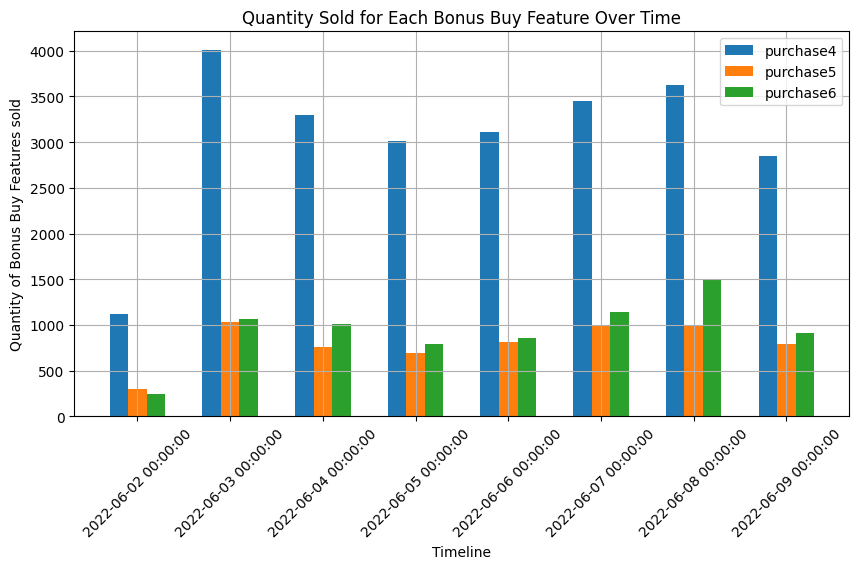

In [6]:
# Plotting a 10x5 chart
figure, axes = pyplt.subplots(figsize=(10, 5))

# Pivoting to sort it by timestamp
the_pivot = Complete_DF.pivot(columns='FeatureBuyChoice', index='timestamp', values='Purchased Feature count')


#defining the guide for where the bar must print in the grid chart
length_for_index = len(the_pivot.index)
guide = np.arange(length_for_index)

# Setting the width of the bars for right visibility
wideness = 0.20

#defining bars for each bonus buy feature for the bar chart
purchase4bar = axes.bar(guide, the_pivot['purchase4'], wideness, label='purchase4')
purchase5bar = axes.bar(guide + wideness, the_pivot['purchase5'], wideness, label='purchase5')
purchase6bar = axes.bar(guide + wideness*2, the_pivot['purchase6'], wideness, label='purchase6')

# Adding Chart's Description for interpretation
axes.set_xlabel('Timeline')
axes.set_ylabel('Quantity of Bonus Buy Features sold')
axes.set_title('Quantity Sold for Each Bonus Buy Feature Over Time')


# Displaying the chart

# Applying the bars on the plot at right grid
axes.set_xticks(guide + wideness)

# before this line, the x-lables are numerical form of the BonusBuyFeature, converting it into actual worded labels
axes.set_xticklabels(the_pivot.index, rotation=45)

axes.legend()
pyplt.grid(True)
pyplt.show()

### 2. Revenue Analysis (In Game's Currency)
#### Conclusions:

1.   Most Dollar is earned by **purchase4**, making it the top feature sold by quantity as well as revenue
2.   Despite selling significantly more quantity for feature4 over feature6, the result in terms of Dollar shows that Revenue is not linearly dependent on Quantity Sold



#### (I) Revenue per Product

##### Exhibit A -- Comparing Total Revenue

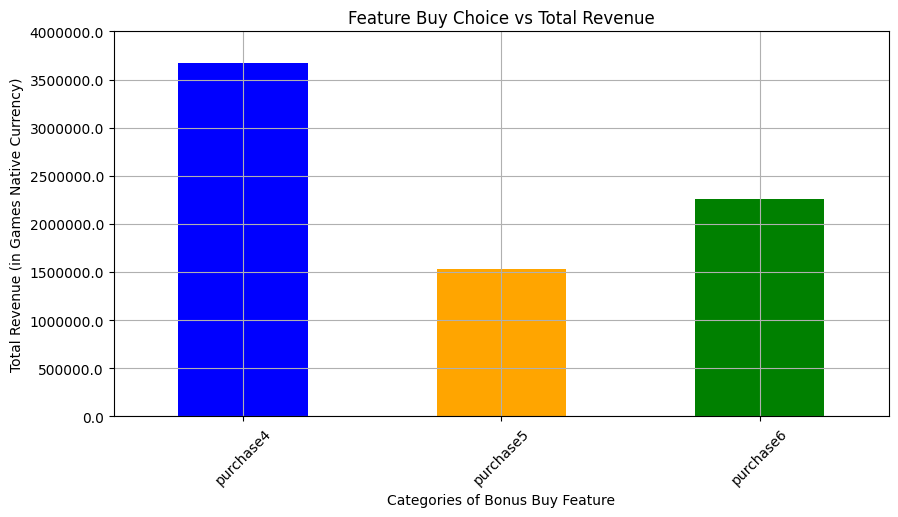

In [7]:
# Plotting a 10x5 chart
pyplt.figure(figsize=(10, 5))

# Clustering the unique features from the entries
unique_features_DF = Complete_DF.groupby('FeatureBuyChoice')['Total Cost'].sum()

# constructing the bar chart
axes = unique_features_DF.plot(x='FeatureBuyChoice', y='Total Cost', kind='bar', color=['blue', 'orange', 'green'])

# Adding Chart's Description for interpretation
pyplt.xlabel('Categories of Bonus Buy Feature')
pyplt.ylabel('Total Revenue (in Games Native Currency)')
pyplt.title('Feature Buy Choice vs Total Revenue')

# Displaying the chart

# Retrieveing Current y lables [since yticks are mutlidimentional, i am only retrieving quantity values from y]
labels_content, remaining_args = pyplt.yticks()
# Making sure current y lables are not truncated
pyplt.yticks(labels_content, labels=labels_content)

pyplt.xticks(rotation=45)
pyplt.grid(True)
pyplt.show()

##### Exhibit B -- Comparing Marketshare of the Purchases

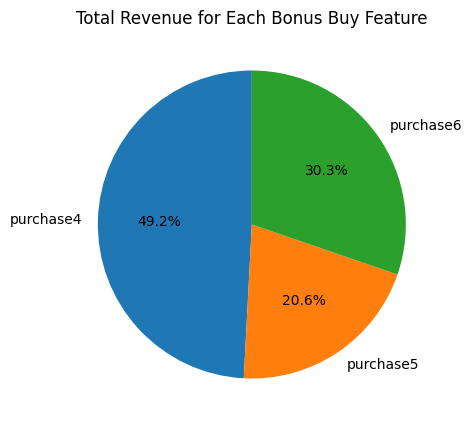

In [8]:
# Plotting a 5x5 pie chart
figure, axes = pyplt.subplots(figsize=(5, 5))

# Clustering the unique features from the entries
unique_features_DF = Complete_DF.groupby('FeatureBuyChoice')['Total Cost'].sum()

# Creating a Pie Chart
axes.pie(unique_features_DF, autopct='%1.1f%%', labels=unique_features_DF.index, startangle=90)

# Adding Chart's Description for interpretation
axes.set_title('Total Revenue for Each Bonus Buy Feature')

#Displaying the chart
pyplt.show()

#### (II) Revenue-Share by Each Bonus Buy Feature per Day

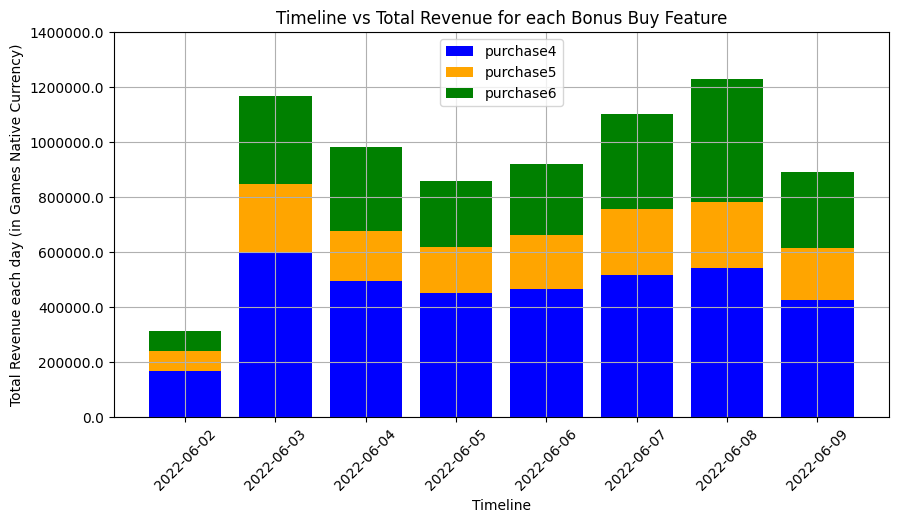

In [9]:
# Plotting a 10x5 chart
chart, axes = pyplt.subplots(figsize=(10, 5))

# Clustering TimeStamps by Features from the DF
unique_features_DF = Complete_DF.groupby('timestamp')['Total Cost'].sum().reset_index()

# Pivoting to sort it by timestamp
the_pivot = Complete_DF.pivot(index='timestamp', columns='FeatureBuyChoice', values='Total Cost')


# Plotting the chart on right place on each bar
axes.bar(unique_features_DF['timestamp'], the_pivot['purchase4'], label='purchase4', color='blue')
axes.bar(unique_features_DF['timestamp'], the_pivot['purchase5'], label='purchase5', color='orange', bottom=(the_pivot['purchase4'])) #plotting over the purchase4 bar
axes.bar(unique_features_DF['timestamp'], the_pivot['purchase6'], label='purchase6', color='green', bottom=(the_pivot['purchase4'] + the_pivot['purchase5'])) #plotting over the purchase5 bar

# Adding Chart's Description for interpretation
axes.set_xlabel('Timeline')
axes.set_ylabel('Total Revenue each day (in Games Native Currency)')
axes.set_title('Timeline vs Total Revenue for each Bonus Buy Feature')
axes.legend()

# Displaying the chart

# Retrieveing Current y lables [since yticks are mutlidimentional, i am only retrieving quantity values from y ticks]
labels_content, remaining_args = pyplt.yticks()
# Making sure current y lables are not truncated
pyplt.yticks(labels_content, labels=labels_content)

pyplt.xticks(rotation=45)
pyplt.grid(True)
pyplt.show()

# Additional Data? (Question 2)

#### Question 2: What other fields would you request to be added to get additional insights?

If possible, I would like to request the following additional telemeteries:


1.   Session IDs
2.   Time Spent to purchase on each Bonus Buy Feature
3.   Outcome of the spins for each feature (did player win/lose?)
4.   Player Segmentation with Session IDs
5.   Telemetry for odds for win/lose for each Bonus Buy Feature

